<a href="https://colab.research.google.com/github/Sameersah/eda-and-apache-beam/blob/main/assignment-1/assignment1_EDA_using_D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

Step 1: Load the dataset and perform basic exploration

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/data/gym_members_exercise_tracking.csv'
data = pd.read_csv(file_path)

# Basic exploration
print("Dataset Shape:", data.shape)



Dataset Shape: (973, 15)


In [3]:
print("\nColumn Names:\n", data.columns)



Column Names:
 Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [4]:
print("\nFirst 5 Rows:\n", data.head())


First 5 Rows:
    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \

Step 2: Data Cleaning and Preprocessing

In [5]:
# 1. Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())


Missing Values per Column:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [6]:
# 2. Check data types
print("\nData Types:\n", data.dtypes)




Data Types:
 Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


In [7]:
# 3. Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")




Number of duplicate rows: 0


In [8]:
# 4. Descriptive statistics to identify outliers
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000 

Step 3: Handling Outliers

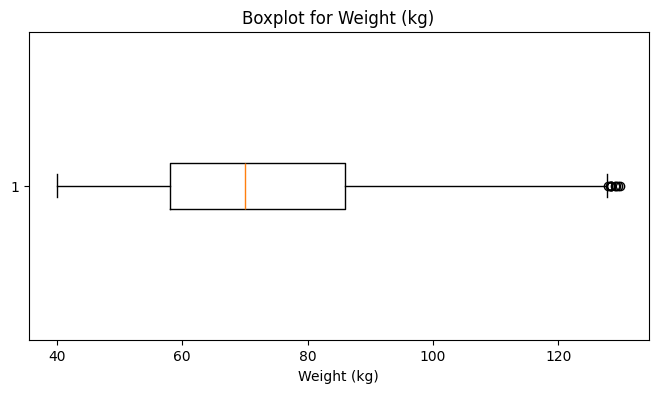

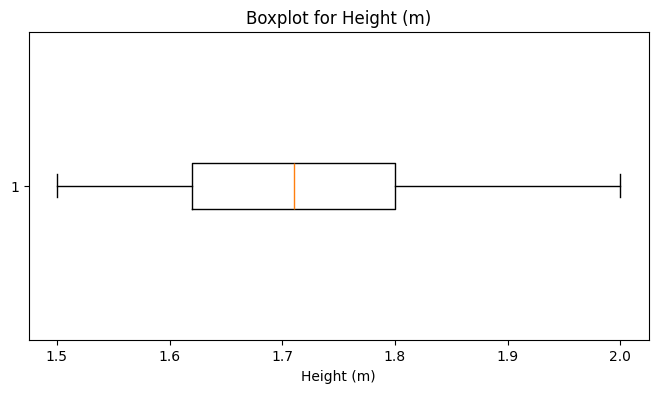

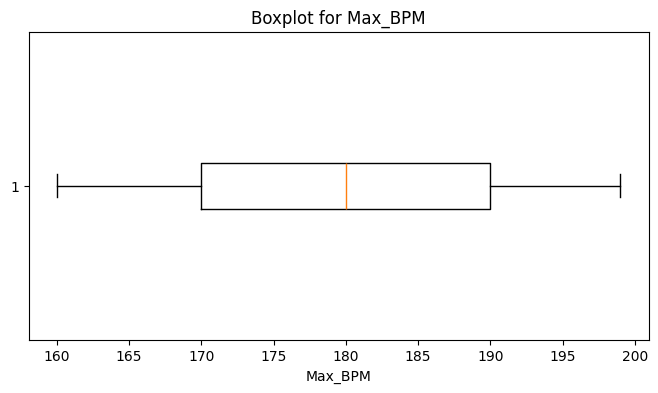

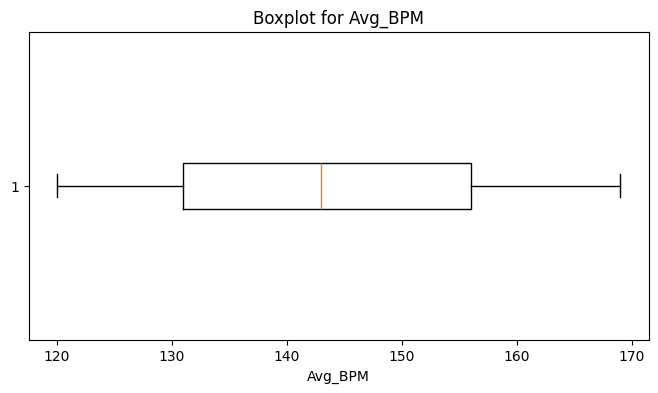

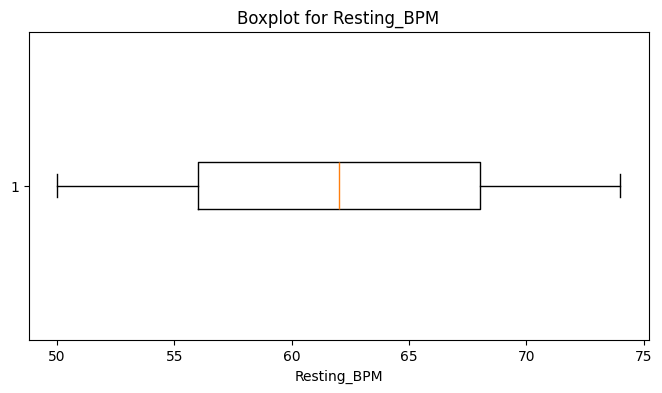

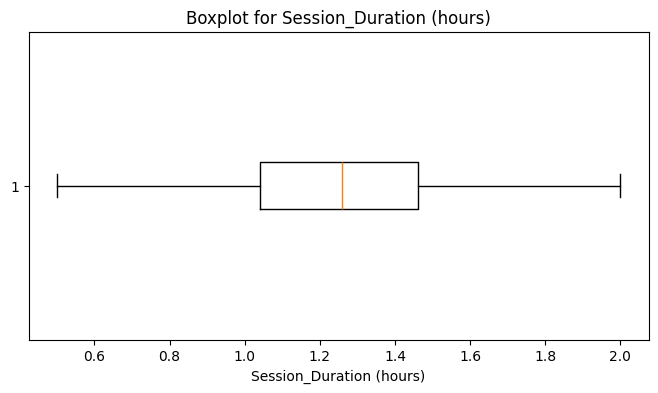

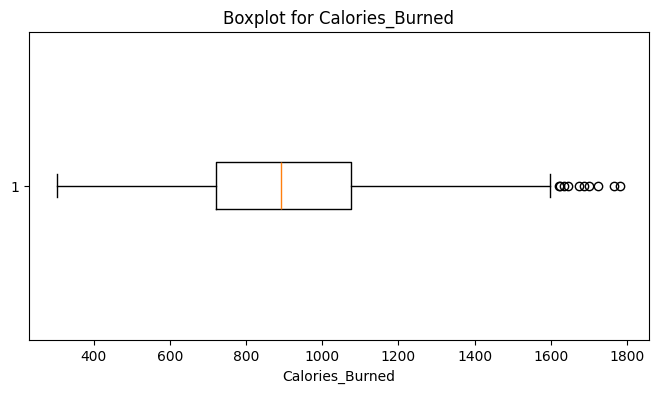

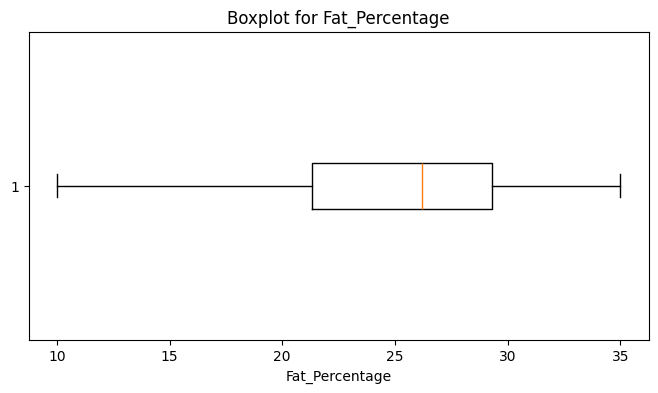

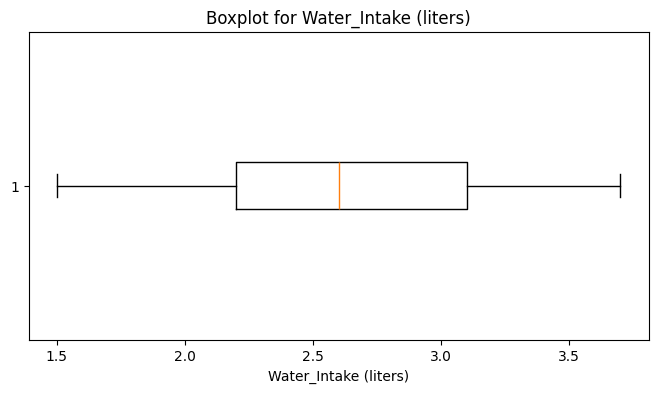

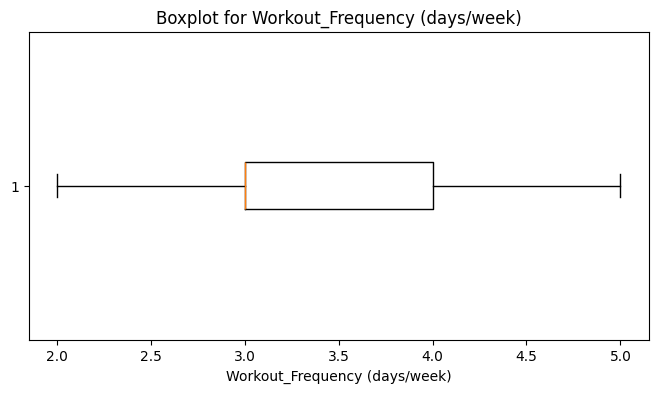

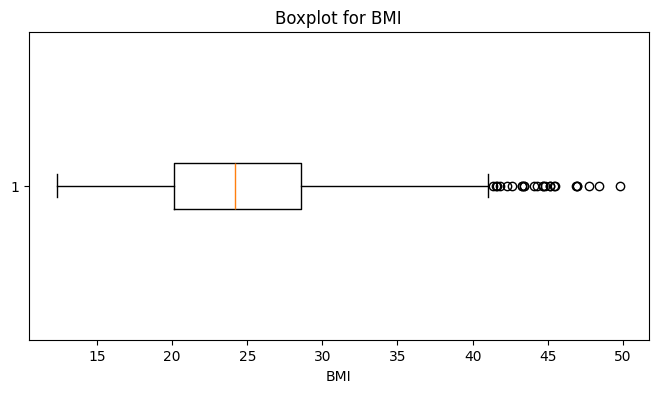

In [9]:
import matplotlib.pyplot as plt

# Columns to visualize for outliers
numerical_columns = [
    'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
    'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI'
]

# Plot boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[column], vert=False)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()


Step 4: Flagging Outliers Using the IQR Method

In [10]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(data, numerical_columns)

# Print the number of outliers for each column
for column, indices in outliers.items():
    print(f"Column: {column}, Outliers: {len(indices)}")


Column: Weight (kg), Outliers: 9
Column: Height (m), Outliers: 0
Column: Max_BPM, Outliers: 0
Column: Avg_BPM, Outliers: 0
Column: Resting_BPM, Outliers: 0
Column: Session_Duration (hours), Outliers: 0
Column: Calories_Burned, Outliers: 10
Column: Fat_Percentage, Outliers: 0
Column: Water_Intake (liters), Outliers: 0
Column: Workout_Frequency (days/week), Outliers: 0
Column: BMI, Outliers: 25


In [11]:
# Remove outliers safely
def remove_outliers_safely(df, outliers):
    outlier_indices = set([idx for indices in outliers.values() for idx in indices])
    return df.drop(index=outlier_indices, errors='ignore')

# Remove outliers and check the resulting shape
cleaned_data = remove_outliers_safely(data, outliers)
cleaned_shape = cleaned_data.shape
cleaned_shape


(932, 15)

Step 5: Preparing Data for D3.js Visualizations

Step 5.1: Save the cleaned dataset

In [12]:
# Save cleaned dataset to a file
cleaned_file_path = '/content/data/cleaned_gym_data.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: /content/data/cleaned_gym_data.csv


Step 5.2: Basic HTML environment for D3.js

In [15]:
%%writefile d3_visualization.html
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        .bar {
            fill: steelblue;
        }
        .bar:hover {
            fill: orange;
        }
    </style>
</head>
<body>
    <h1>D3.js Visualization</h1>
    <svg width="800" height="400"></svg>
    <script>
        // Load and visualize data using D3.js
        d3.csv("cleaned_gym_data.csv").then(function(data) {
            // Visualization code goes here
            console.log(data);  // Example: check data is loaded
        });
    </script>
</body>
</html>


Overwriting d3_visualization.html


Step 6: Adding Specific D3.js Visualizations

In [16]:
%%writefile d3_visualization.html
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        .bar {
            fill: steelblue;
        }
        .bar:hover {
            fill: orange;
        }
        .axis-label {
            font-size: 14px;
        }
    </style>
</head>
<body>
    <h1>D3.js Bar Chart: Average Calories Burned per Workout Type</h1>
    <svg width="800" height="400"></svg>
    <script>
        const margin = { top: 20, right: 30, bottom: 50, left: 60 },
              width = 800 - margin.left - margin.right,
              height = 400 - margin.top - margin.bottom;

        const svg = d3.select("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
          .append("g")
            .attr("transform", `translate(${margin.left},${margin.top})`);

        // Load data
        d3.csv("cleaned_gym_data.csv").then(data => {
            // Group data by Workout_Type and calculate average Calories_Burned
            const avgCalories = d3.rollup(data,
                v => d3.mean(v, d => +d.Calories_Burned),
                d => d.Workout_Type
            );

            const workoutTypes = Array.from(avgCalories.keys());
            const calorieValues = Array.from(avgCalories.values());

            // Scales
            const x = d3.scaleBand()
                .domain(workoutTypes)
                .range([0, width])
                .padding(0.1);

            const y = d3.scaleLinear()
                .domain([0, d3.max(calorieValues)])
                .nice()
                .range([height, 0]);

            // Axes
            svg.append("g")
                .attr("transform", `translate(0,${height})`)
                .call(d3.axisBottom(x))
              .selectAll("text")
                .attr("transform", "rotate(-45)")
                .style("text-anchor", "end");

            svg.append("g")
                .call(d3.axisLeft(y));

            // Bars
            svg.selectAll(".bar")
                .data(Array.from(avgCalories))
                .enter().append("rect")
                .attr("class", "bar")
                .attr("x", d => x(d[0]))
                .attr("y", d => y(d[1]))
                .attr("width", x.bandwidth())
                .attr("height", d => height - y(d[1]));

            // Labels
            svg.append("text")
                .attr("x", width / 2)
                .attr("y", height + margin.bottom - 10)
                .attr("text-anchor", "middle")
                .attr("class", "axis-label")
                .text("Workout Type");

            svg.append("text")
                .attr("x", -height / 2)
                .attr("y", -margin.left + 20)
                .attr("text-anchor", "middle")
                .attr("transform", "rotate(-90)")
                .attr("class", "axis-label")
                .text("Average Calories Burned");
        });
    </script>
</body>
</html>


Overwriting d3_visualization.html
